<a href="https://colab.research.google.com/github/nikmat04/Stock-Prediction/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Assuming companies is a list of stock tickers, and start_date, end_date are specified
companies = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NKE', 'NVDA', 'CINF', 'TSLA', 'DIS', 'ADDYY']
start_date = '2012-01-01'
end_date = '2022-01-01'
# Download historical financial data for the specified companies and date range
df = yf.download(companies, start=start_date, end=end_date)
df

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  10 of 10 completed


Price        Adj Close                                                  \
Ticker            AAPL       ADDYY        AMZN        CINF         DIS   
Date                                                                     
2012-01-03   12.433825   28.984343    8.951500   21.026663   34.189194   
2012-01-04   12.500643   28.728062    8.875500   20.923586   34.671104   
2012-01-05   12.639428   28.557222    8.880500   21.219059   35.251190   
2012-01-06   12.771557   28.070303    9.130500   21.074759   35.617100   
2012-01-09   12.751297   28.958710    8.928000   21.267164   35.474304   
...                ...         ...         ...         ...         ...   
2021-12-27  178.065659  140.441605  169.669495  108.183426  152.303635   
2021-12-28  177.038712  140.314682  170.660995  108.856499  154.695831   
2021-12-29  177.127579  140.773499  169.201004  109.036613  154.366898   
2021-12-30  175.962402  139.621567  168.644501  107.756836  155.423447   
2021-12-31  175.340332  140.578262  166.716995  108.003311  154.386841   

Price                                                                   ...  \
Ticker            GOOG        MSFT         NKE        NVDA        TSLA  ...   
Date                                                                    ...   
2012-01-03   16.573130   21.238756   21.074884    3.219882    1.872000  ...   
2012-01-04   16.644611   21.738585   21.381826    3.256576    1.847333  ...   
2012-01-05   16.413727   21.960730   21.368776    3.373537    1.808000  ...   
2012-01-06   16.189817   22.301882   21.331760    3.334550    1.794000  ...   
2012-01-09   15.503389   22.008335   21.410135    3.334550    1.816667  ...   
...                ...         ...         ...         ...         ...  ...   
2021-12-27  148.063995  335.668396  163.682892  309.023834  364.646667  ...   
2021-12-28  146.447998  334.492157  162.549866  302.802368  362.823334  ...   
2021-12-29  146.504501  335.178284  164.855011  299.596771  362.063324  ...   
2021-12-30  146.002502  332.600433  163.595016  295.452454  356.779999  ...   
2021-12-31  144.679504  329.659821  162.794067  293.704865  352.260010  ...   

Price          Volume                                                   \
Ticker           AAPL   ADDYY       AMZN     CINF       DIS       GOOG   
Date                                                                     
2012-01-03  302220800   18800  102216000  1014400   9704200  147611217   
2012-01-04  260022000    9700   84104000  1008000   9889900  114989399   
2012-01-05  271269600   14300   76182000  1038000  14327100  131808205   
2012-01-06  318292800   42000  140168000  1070300  14401600  108119746   
2012-01-09  394024400   34800  101138000   806900  12145200  233776981   
...               ...     ...        ...      ...       ...        ...   
2021-12-27   74919600  101300   58688000   329000   7762000   13256000   
2021-12-28   79144300   67500   54638000   329200  12198700   18624000   
2021-12-29   62348900   53300   35754000   208700   8737000   17022000   
2021-12-30   59773000   64200   37584000   337900   7228400   12978000   
2021-12-31   64062300   36400   47830000   414800   6410200   17298000   

Price                                               
Ticker          MSFT       NKE      NVDA      TSLA  
Date                                                
2012-01-03  64731500  10944400  46804400  13921500  
2012-01-04  80516100   9440800  34737200   9451500  
2012-01-05  56081400   8393200  56354800  15082500  
2012-01-06  99455500   7760800  53325200  14794500  
2012-01-09  59706800  10045600  50824400  13455000  
...              ...       ...       ...       ...  
2021-12-27  19947000   3769300  40368600  71145900  
2021-12-28  15661500   2658600  42059100  60324000  
2021-12-29  15042000   3830900  34313900  56154000  
2021-12-30  15994500   2666800  30886400  47040900  
2021-12-31  18000800   2752000  26653000  40733700  

[2517 rows x 60 columns]

<Axes: xlabel='Date'>

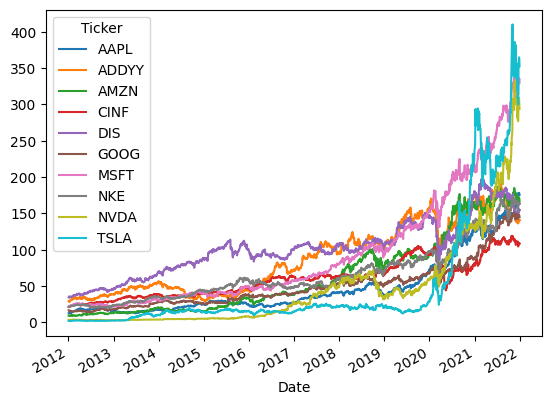

In [2]:
data=df['Adj Close']
data.plot()

In [3]:
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(ELE):
    result=adfuller(ELE)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(data['AAPL'])
adfuller_test(data['ADDYY'])
adfuller_test(data['AMZN'])
adfuller_test(data['CINF'])
adfuller_test(data['DIS'])
adfuller_test(data['GOOG'])
adfuller_test(data['MSFT'])
adfuller_test(data['NKE'])
adfuller_test(data['NVDA'])
adfuller_test(data['TSLA'])

ADF Test Statistic : 3.0665312137848426
p-value : 1.0
#Lags Used : 27
Number of Observations Used : 2489
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
ADF Test Statistic : -1.0221831285947824
p-value : 0.7450877817409612
#Lags Used : 9
Number of Observations Used : 2507
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
ADF Test Statistic : 1.083628057008241
p-value : 0.9950744439465722
#Lags Used : 27
Number of Observations Used : 2489
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
ADF Test Statistic : -0.4347890416461773
p-value : 0.9041262136748642
#Lags Used : 23
Number of Observations Used : 2493
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
ADF Test Statistic : -1.4476095326719576
p-value : 0.5592508850672381
#Lags Used : 24
Number of Observations Used : 2492
weak evide

In [4]:
data['test_AAPL'] = data['AAPL'] - data['AAPL'].shift(1)
data['test_ADDYY'] = data['ADDYY'] - data['ADDYY'].shift(1)
data['test_AMZN'] = data['AMZN'] - data['AMZN'].shift(1)
data['test_CINF'] = data['CINF'] - data['CINF'].shift(1)
data['test_DIS'] = data['DIS'] - data['DIS'].shift(1)
data['test_GOOG'] = data['GOOG'] - data['GOOG'].shift(1)
data['test_MSFT'] = data['MSFT'] - data['MSFT'].shift(1)
data['test_NKE'] = data['NKE'] - data['NKE'].shift(1)
data['test_NVDA'] = data['NVDA'] - data['NVDA'].shift(1)
data['test_TSLA'] = data['TSLA'] - data['TSLA'].shift(1)
data

<ipython-input-4-7d0e8f785e53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['test_AAPL'] = data['AAPL'] - data['AAPL'].shift(1)
<ipython-input-4-7d0e8f785e53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['test_ADDYY'] = data['ADDYY'] - data['ADDYY'].shift(1)
<ipython-input-4-7d0e8f785e53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

Ticker,AAPL,ADDYY,AMZN,CINF,DIS,GOOG,MSFT,NKE,NVDA,TSLA,test_AAPL,test_ADDYY,test_AMZN,test_CINF,test_DIS,test_GOOG,test_MSFT,test_NKE,test_NVDA,test_TSLA
Date,,,,,,,,,,,,,,,,,,,,
2012-01-03,12.433825,28.984343,8.951500,21.026663,34.189194,16.573130,21.238756,21.074884,3.219882,1.872000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,12.500643,28.728062,8.875500,20.923586,34.671104,16.644611,21.738585,21.381826,3.256576,1.847333,0.066817,-0.256281,-0.076000,-0.103077,0.481911,0.071482,0.499828,0.306942,0.036694,-0.024667
2012-01-05,12.639428,28.557222,8.880500,21.219059,35.251190,16.413727,21.960730,21.368776,3.373537,1.808000,0.138785,-0.170839,0.005000,0.295473,0.580086,-0.230885,0.222145,-0.013050,0.116962,-0.039333
2012-01-06,12.771557,28.070303,9.130500,21.074759,35.617100,16.189817,22.301882,21.331760,3.334550,1.794000,0.132129,-0.486919,0.250000,-0.144300,0.365910,-0.223909,0.341152,-0.037016,-0.038987,-0.014000
2012-01-09,12.751297,28.958710,8.928000,21.267164,35.474304,15.503389,22.008335,21.410135,3.334550,1.816667,-0.020260,0.888407,-0.202499,0.192406,-0.142796,-0.686428,-0.293547,0.078375,0.000000,0.022667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,178.065659,140.441605,169.669495,108.183426,152.303635,148.063995,335.668396,163.682892,309.023834,364.646667,3.999130,1.552216,-1.399002,1.687416,-0.827301,0.921494,7.606293,1.865570,13.032135,8.980011
2021-12-28,177.038712,140.314682,170.660995,108.856499,154.695831,146.447998,334.492157,162.549866,302.802368,362.823334,-1.026947,-0.126923,0.991501,0.673073,2.392197,-1.615997,-1.176239,-1.133026,-6.221466,-1.823334
2021-12-29,177.127579,140.773499,169.201004,109.036613,154.366898,146.504501,335.178284,164.855011,299.596771,362.063324,0.088867,0.458817,-1.459991,0.180115,-0.328934,0.056503,0.686127,2.305145,-3.205597,-0.760010


In [5]:
data=data.iloc[1:, :]
data

Ticker,AAPL,ADDYY,AMZN,CINF,DIS,GOOG,MSFT,NKE,NVDA,TSLA,test_AAPL,test_ADDYY,test_AMZN,test_CINF,test_DIS,test_GOOG,test_MSFT,test_NKE,test_NVDA,test_TSLA
Date,,,,,,,,,,,,,,,,,,,,
2012-01-04,12.500643,28.728062,8.875500,20.923586,34.671104,16.644611,21.738585,21.381826,3.256576,1.847333,0.066817,-0.256281,-0.076000,-0.103077,0.481911,0.071482,0.499828,0.306942,0.036694,-0.024667
2012-01-05,12.639428,28.557222,8.880500,21.219059,35.251190,16.413727,21.960730,21.368776,3.373537,1.808000,0.138785,-0.170839,0.005000,0.295473,0.580086,-0.230885,0.222145,-0.013050,0.116962,-0.039333
2012-01-06,12.771557,28.070303,9.130500,21.074759,35.617100,16.189817,22.301882,21.331760,3.334550,1.794000,0.132129,-0.486919,0.250000,-0.144300,0.365910,-0.223909,0.341152,-0.037016,-0.038987,-0.014000
2012-01-09,12.751297,28.958710,8.928000,21.267164,35.474304,15.503389,22.008335,21.410135,3.334550,1.816667,-0.020260,0.888407,-0.202499,0.192406,-0.142796,-0.686428,-0.293547,0.078375,0.000000,0.022667
2012-01-10,12.796956,29.232067,8.967000,21.521408,35.367207,15.520326,22.087667,21.436251,3.320789,1.841333,0.045659,0.273357,0.039000,0.254244,-0.107098,0.016936,0.079332,0.026115,-0.013762,0.024666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,178.065659,140.441605,169.669495,108.183426,152.303635,148.063995,335.668396,163.682892,309.023834,364.646667,3.999130,1.552216,-1.399002,1.687416,-0.827301,0.921494,7.606293,1.865570,13.032135,8.980011
2021-12-28,177.038712,140.314682,170.660995,108.856499,154.695831,146.447998,334.492157,162.549866,302.802368,362.823334,-1.026947,-0.126923,0.991501,0.673073,2.392197,-1.615997,-1.176239,-1.133026,-6.221466,-1.823334
2021-12-29,177.127579,140.773499,169.201004,109.036613,154.366898,146.504501,335.178284,164.855011,299.596771,362.063324,0.088867,0.458817,-1.459991,0.180115,-0.328934,0.056503,0.686127,2.305145,-3.205597,-0.760010


In [6]:

adfuller_test(data['test_AAPL'].dropna())
adfuller_test(data['test_ADDYY'].dropna())
adfuller_test(data['test_AMZN'].dropna())
adfuller_test(data['test_CINF'].dropna())
adfuller_test(data['test_DIS'].dropna())
adfuller_test(data['test_GOOG'].dropna())
adfuller_test(data['test_MSFT'].dropna())
adfuller_test(data['test_NKE'].dropna())
adfuller_test(data['test_NVDA'].dropna())
adfuller_test(data['test_TSLA'].dropna())

ADF Test Statistic : -9.629114309448287
p-value : 1.6301849986161066e-16
#Lags Used : 26
Number of Observations Used : 2489
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -17.148594707306888
p-value : 6.966952911228927e-30
#Lags Used : 8
Number of Observations Used : 2507
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -11.65303835825239
p-value : 2.015843411979614e-21
#Lags Used : 26
Number of Observations Used : 2489
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -11.949484139167968
p-value : 4.350811201214836e-22
#Lags Used : 22
Number of Observations Used : 2493
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
ADF Test Statistic : -9.13994852855542

<Axes: xlabel='Date'>

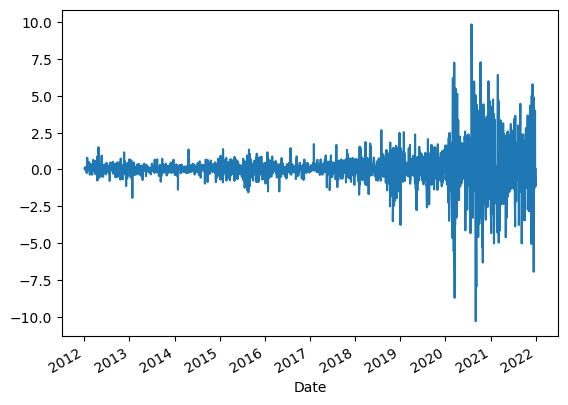

In [7]:
data['test_AAPL'].plot()

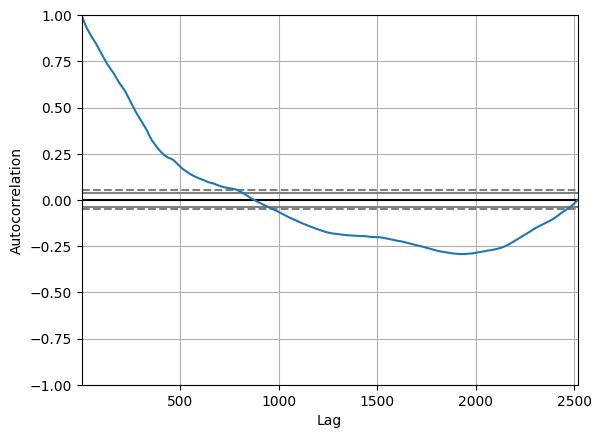

In [8]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['AAPL'])
plt.show()

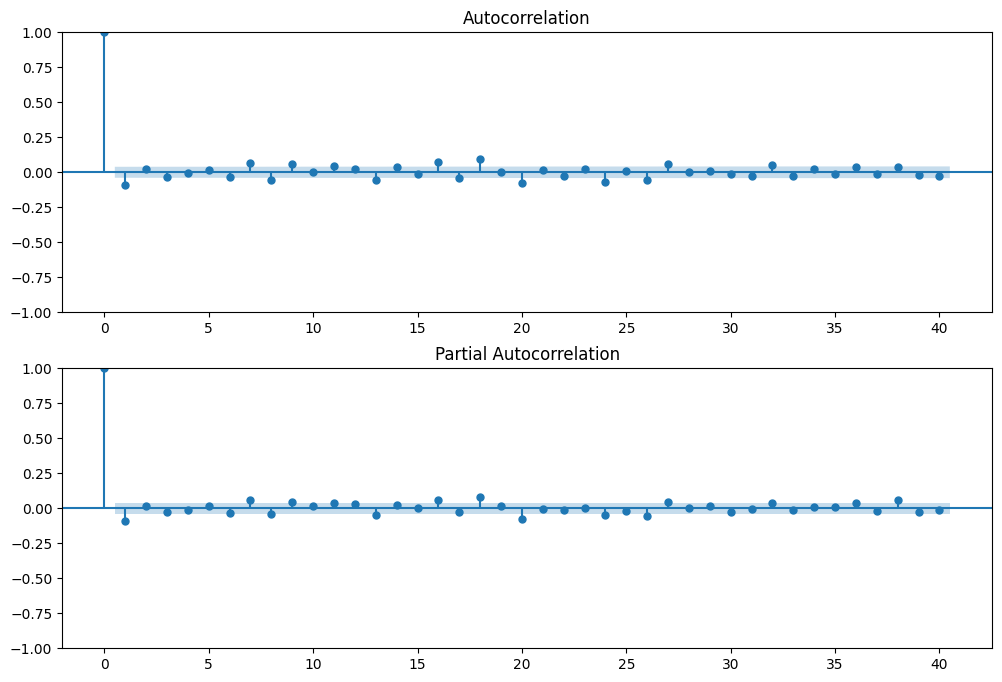

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['test_AAPL'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['test_AAPL'].iloc[13:],lags=40,ax=ax2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

<Axes: xlabel='Date'>

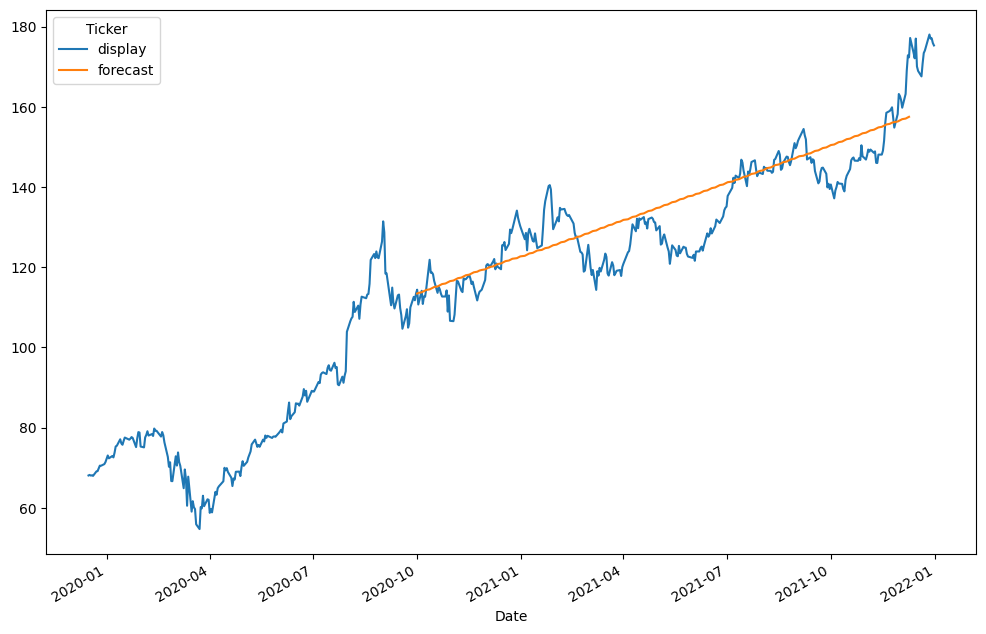

In [14]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['AAPL'],order=(2,2,2))
model_fit=model.fit()
data['forecast']=model_fit.predict(start=2200,end=2500,dynamic=True)
data['display']=data['AAPL'].iloc[2000:]
data[['display','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

<Axes: xlabel='Date'>

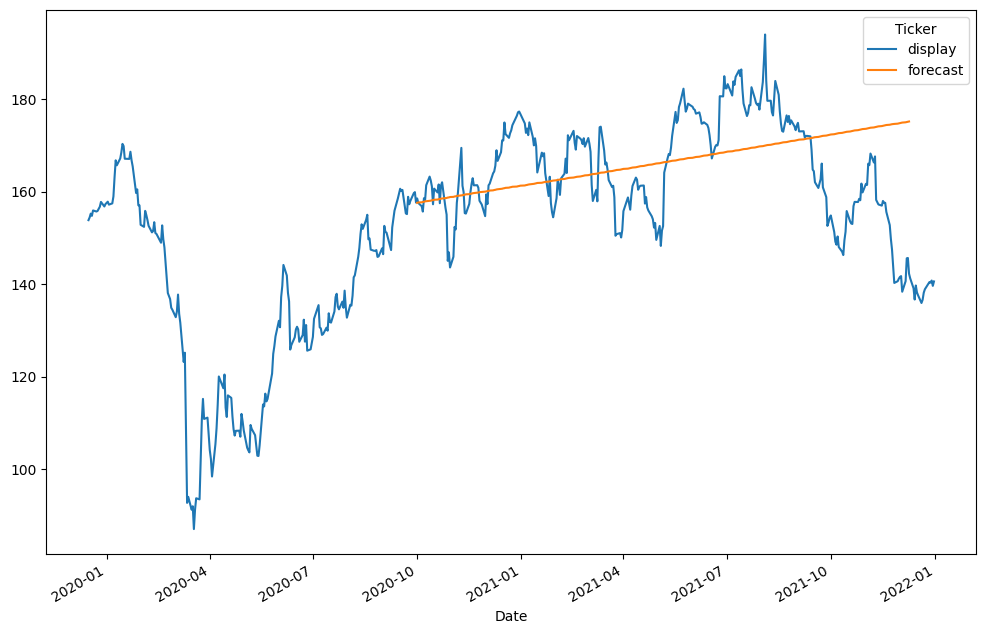

In [16]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['ADDYY'],order=(2,2,2))
model_fit=model.fit()
data['forecast']=model_fit.predict(start=2200,end=2500,dynamic=True)
data['display']=data['ADDYY'].iloc[2000:]
data[['display','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-17-3

<Axes: xlabel='Date'>

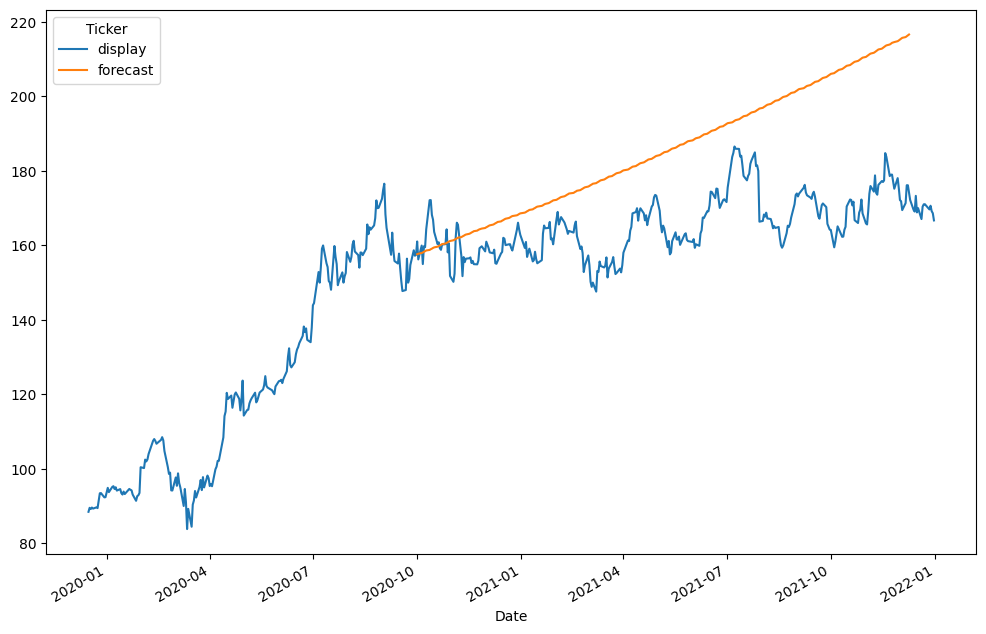

In [17]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['AMZN'],order=(2,3,3))
model_fit=model.fit()
data['forecast']=model_fit.predict(start=2200,end=2500,dynamic=True)
data['display']=data['AMZN'].iloc[2000:]
data[['display','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-18-dc24d368c5

<Axes: xlabel='Date'>

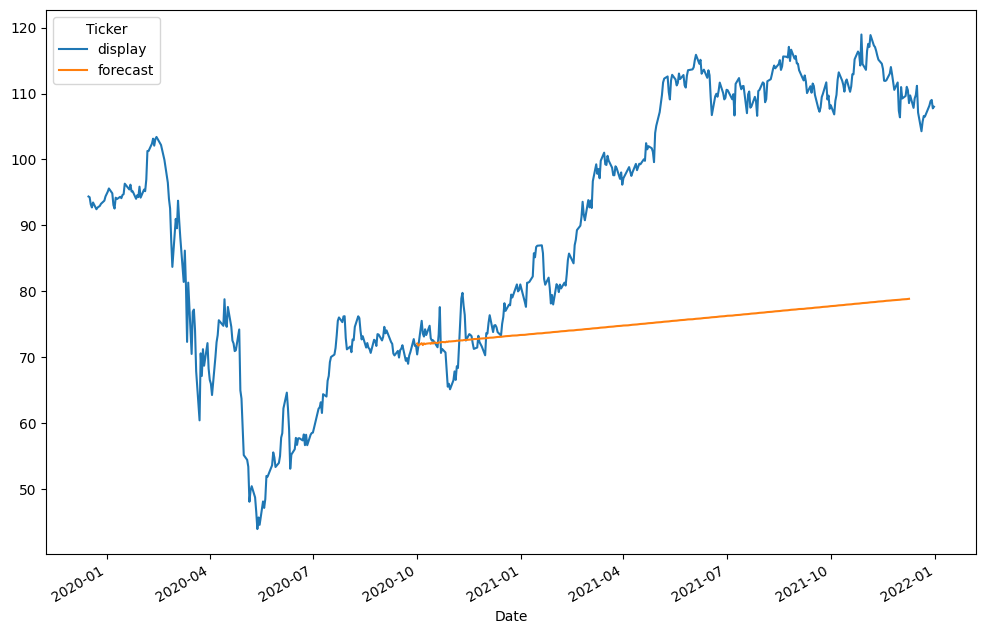

In [18]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['CINF'],order=(2,2,3))
model_fit=model.fit()
data['forecast']=model_fit.predict(start=2200,end=2500,dynamic=True)
data['display']=data['CINF'].iloc[2000:]
data[['display','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

<Axes: xlabel='Date'>

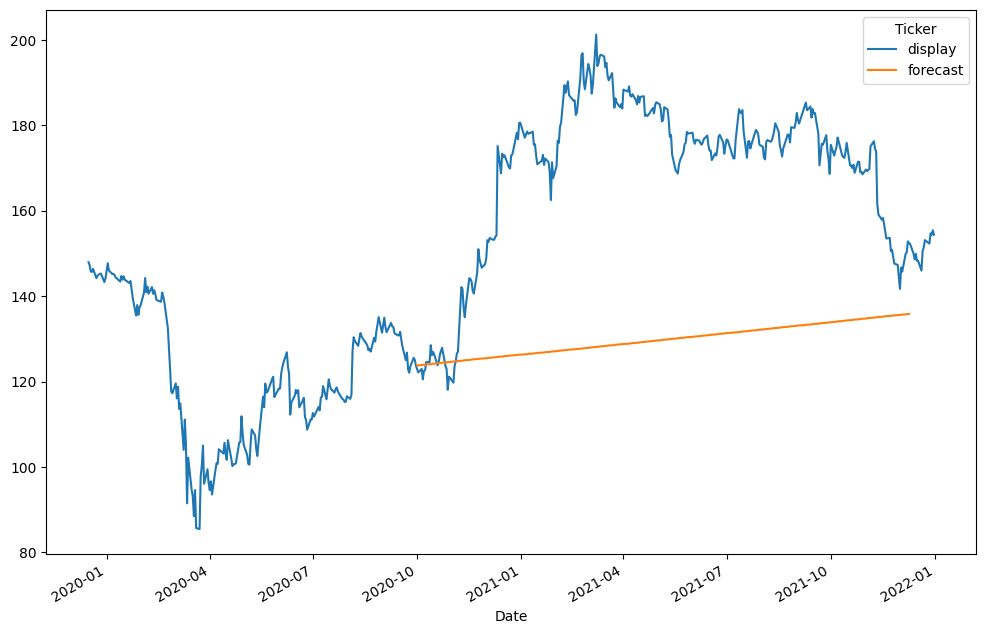

In [24]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['DIS'],order=(1,2,2))
model_fit=model.fit()
data['forecast']=model_fit.predict(start=2200,end=2500,dynamic=True)
data['display']=data['DIS'].iloc[2000:]
data[['display','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

<Axes: xlabel='Date'>

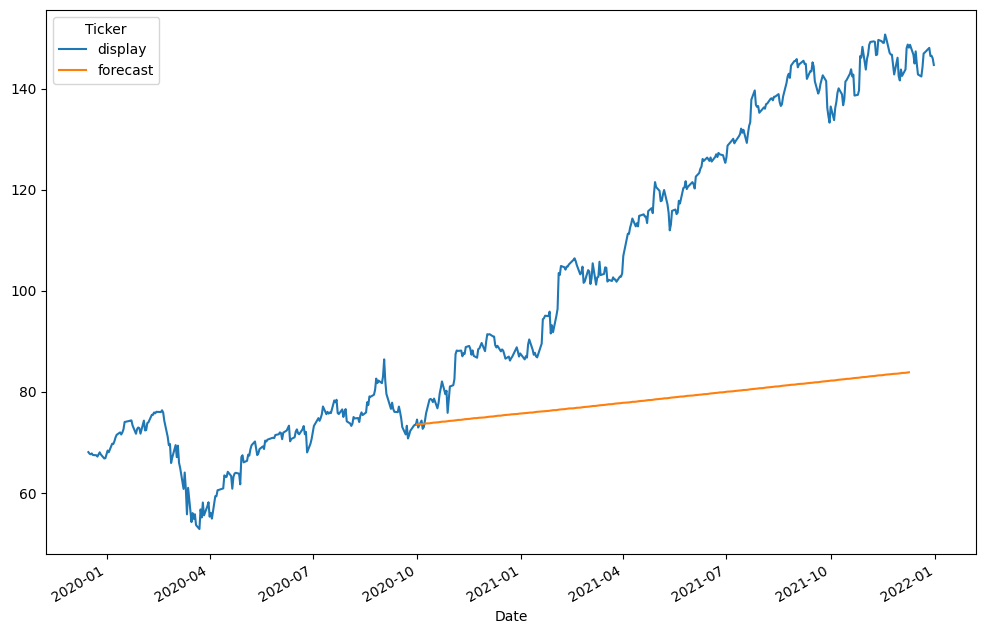

In [25]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['GOOG'],order=(2,2,2))
model_fit=model.fit()
data['forecast']=model_fit.predict(start=2200,end=2500,dynamic=True)
data['display']=data['GOOG'].iloc[2000:]
data[['display','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-26-4

<Axes: xlabel='Date'>

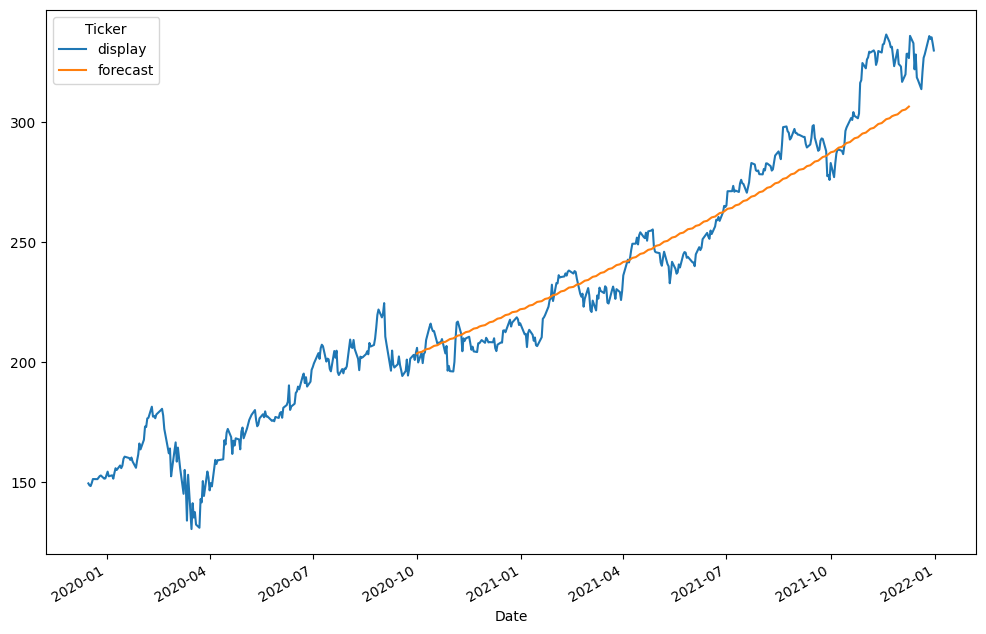

In [26]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['MSFT'],order=(2,3,3))
model_fit=model.fit()
data['forecast']=model_fit.predict(start=2200,end=2500,dynamic=True)
data['display']=data['MSFT'].iloc[2000:]
data[['display','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-27-2

<Axes: xlabel='Date'>

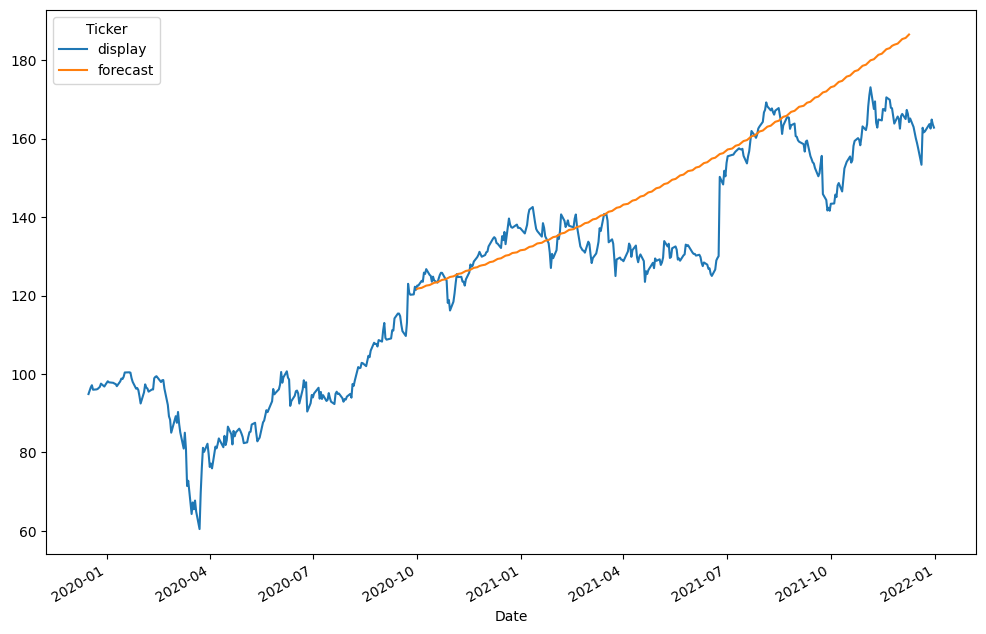

In [27]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['NKE'],order=(2,3,2))
model_fit=model.fit()
data['forecast']=model_fit.predict(start=2200,end=2500,dynamic=True)
data['display']=data['NKE'].iloc[2000:]
data[['display','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-28-1

<Axes: xlabel='Date'>

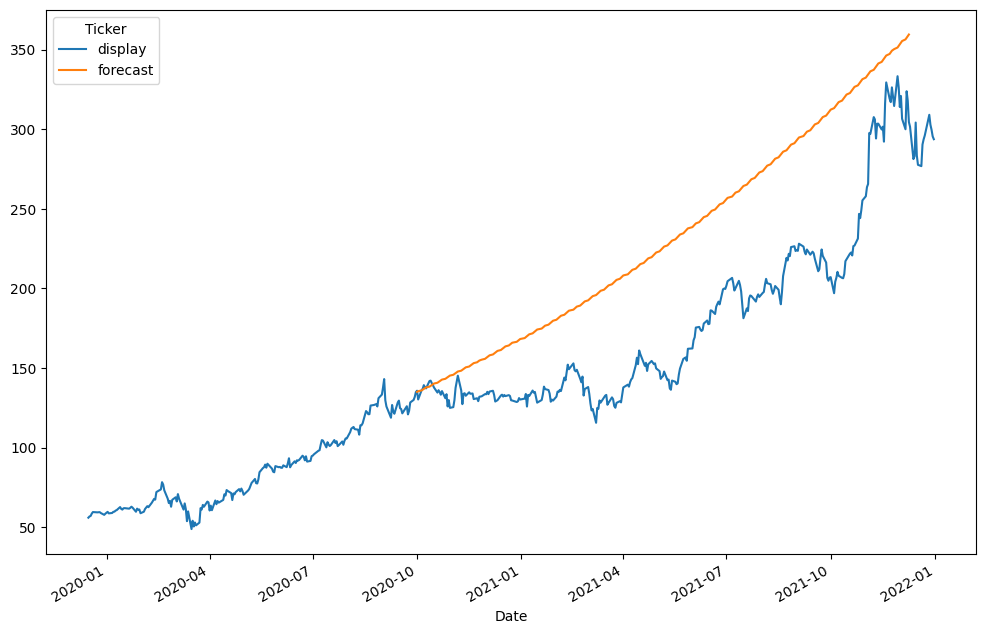

In [28]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['NVDA'],order=(2,3,2))
model_fit=model.fit()
data['forecast']=model_fit.predict(start=2200,end=2500,dynamic=True)
data['display']=data['NVDA'].iloc[2000:]
data[['display','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

<Axes: xlabel='Date'>

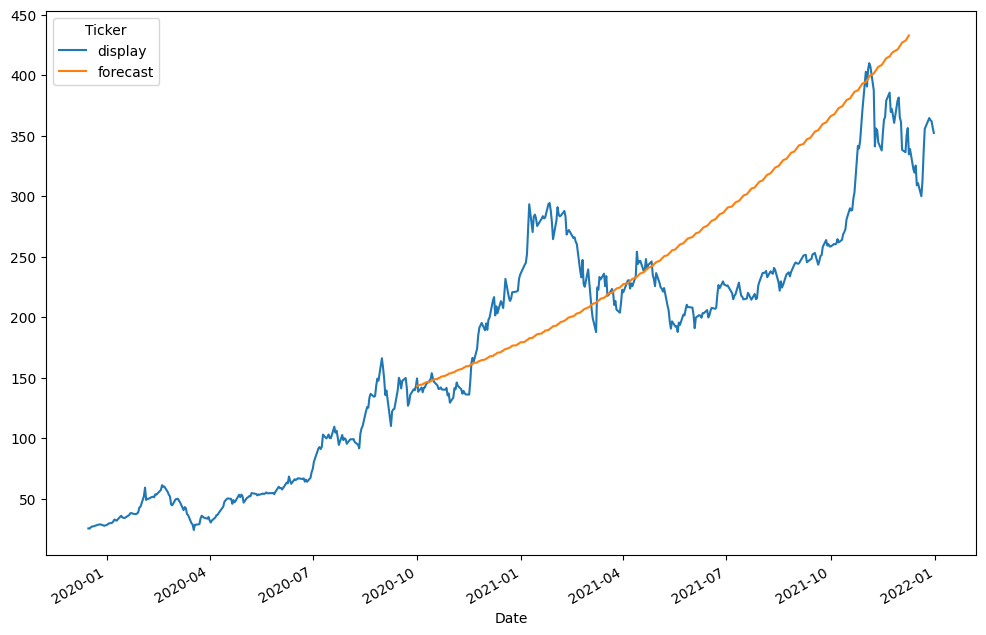

In [29]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(data['TSLA'],order=(2,3,4))
model_fit=model.fit()
data['forecast']=model_fit.predict(start=2200,end=2500,dynamic=True)
data['display']=data['TSLA'].iloc[2000:]
data[['display','forecast']].plot(figsize=(12,8))